In [1]:
import keras
from keras import layers

encoding_dim = 32  

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [2]:
encoder = keras.Model(input_img, encoded)

In [3]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3833 - val_loss: 0.1874
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1778 - val_loss: 0.1521
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1480 - val_loss: 0.1329
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1310 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1207 - val_loss: 0.1135
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1133 - val_loss: 0.1076
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1074 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1035 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1003 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0980 - val_lo

loss: 0.0926 - val_loss: 0.0915

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

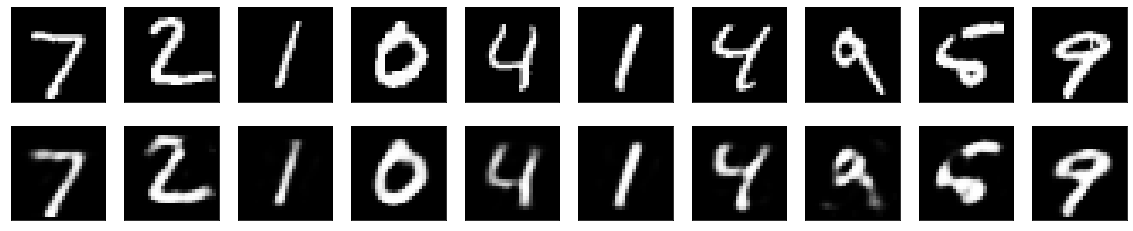

In [9]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [11]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [12]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3426 - val_loss: 0.1680
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1602 - val_loss: 0.1372
Epoch 3/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1348 - val_loss: 0.1223
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1223 - val_loss: 0.1154
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1156 - val_loss: 0.1112
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1117 - val_loss: 0.1080
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1089 - val_loss: 0.1056
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1062 - val_loss: 0.1030
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1037 - val_loss: 0.1006
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.101

loss: 0.0813 - val_loss: 0.0811